<a href="https://colab.research.google.com/github/IWM-S/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 行列加算とOpenCV(addWeighted)、2種類のアルファブレンドの比較

上のコード：ランダムに10x10のドット絵を2つ生成して、行列の加算をしてできた画像と、OpenCVのaddWeightedで生成した画像とのピクセルの一致度を割合で表示します。addWeightedのα値とγ値は編集可能です。

下のコード：上のコードにおいて、2つの画像のα値0から1(等分割51個)、γ値-2から2(等分割201個)、合計51x51x201=522801種類のaddWeightedを実行したものの中から、行列の加算をしたものと最も一致度が高い組み合わせを探し出します。基本的にα値は1、γ値は0、一致度は50%前後になります。

画像1の濃さは？(正の実数)(指定無しの場合0.5になります。)
画像2の濃さは？(正の実数)(指定無しの場合0.5になります。)
ガンマ値は？(任意の実数)(指定なしの場合0になります。)

行列加算


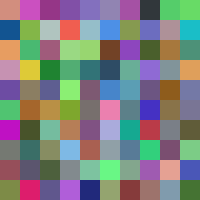


アルファブレンド


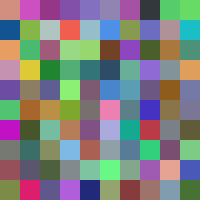


行列加算とアルファブレンド(1:2=0.5:0.5、γ=0)のとき、一致度は49.0%です。


In [151]:
import numpy as np
import cv2,sys
from google.colab.patches import cv2_imshow


#2つの画像と行列加算した画像を生成
img1,img2 = np.random.randint(0, 255, (10, 10, 3)), np.random.randint(0, 255, (10, 10, 3))

img1plus2 = img1*0.5 + img2*0.5
#####################################


#α値、γ値入力部
f1 = input("画像1の濃さは？(正の実数)(指定無しの場合0.5になります。)")
if len(f1) == 0:
  f1 = 0.5

f2 = input("画像2の濃さは？(正の実数)(指定無しの場合0.5になります。)")
if len(f2) == 0:
  f2 = 0.5

gamma = input("ガンマ値は？(任意の実数)(指定なしの場合0になります。)")
if len(gamma) == 0:
  gamma = 0
#####################################


#アルファブレンド部
blended = cv2.addWeighted(img1, float(f1), img2, float(f2), float(gamma))
#####################################


#表示のため大きくしています
img1PLUS2 = cv2.resize(img1plus2, None, fx=20, fy=20, interpolation=cv2.INTER_NEAREST)
Blended = cv2.resize(blended, None, fx=20, fy=20, interpolation=cv2.INTER_NEAREST)
#####################################


#画像と結果を表示
print()
print("行列加算")
cv2_imshow(img1PLUS2)
print()
print("アルファブレンド")
cv2_imshow(Blended)

count=0

print()
print("行列加算とアルファブレンド(1:2={}:{}、γ={})のとき、一致度は{}%です。"
.format(f1, f2, gamma, np.count_nonzero(img1plus2 == blended) / np.size(img1plus2) *100))
#####################################

最大の一致度は、画像1のα値0.5、画像2のα値0.5、γ値0のときで、色の完全一致度は48%です。

行列加算


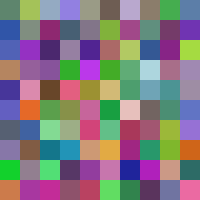


アルファブレンド


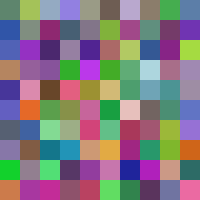

In [155]:
import numpy as np
import cv2,sys
from google.colab.patches import cv2_imshow


#2つの画像と行列加算画像を生成
img1,img2 = np.random.randint(0, 255, (10, 10, 3)), np.random.randint(0, 255, (10, 10, 3))

img1plus2 = img1*0.5 + img2*0.5
#####################################


#変数と最大値保管庫
dec1 = np.linspace(0,1,51)
dec2 = np.linspace(0,1,51)
dec3 = np.linspace(-2,2,201)
maximum_values = [0,0,0,0]
#####################################


#検索部
for i in range(len(dec1)):
  for j in range(len(dec2)):
    for k in range(len(dec3)):
      blended = cv2.addWeighted(img1, dec1[i], img2, dec2[j], dec3[k])
      if np.count_nonzero(img1plus2 == blended) / np.size(img1plus2)  > maximum_values[0]:
        maximum_values[0] = np.count_nonzero(img1plus2 == blended) / np.size(img1plus2)
        maximum_values[1] = dec1[i]
        maximum_values[2] = dec2[j]        
        maximum_values[3] = dec3[k]
#####################################


#結果を表示
print("最大の一致度は、画像1のα値{}、画像2のα値{}、γ値{}のときで、色の完全一致度は{}%です。"
.format(maximum_values[1], maximum_values[2], gamma, int(maximum_values[0]*100)))
#####################################


#最大の組み合わせで再度アルファブレンド
img0 = cv2.addWeighted(img1,maximum_values[1],img2,maximum_values[2],maximum_values[3])
#####################################


#表示のため拡大
img1p2 = cv2.resize(img1plus2, None, fx=20, fy=20, interpolation=cv2.INTER_NEAREST)
img0 = cv2.resize(img0, None, fx=20, fy=20, interpolation=cv2.INTER_NEAREST)
#####################################


#画像表示部
print()
print("行列加算")
cv2_imshow(img1p2)
print()
print("アルファブレンド")
cv2_imshow(img0)
#####################################